<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> <b> Diplomado de Análisis de datos y Machine Learning en Python - Universidad de Antioquia </b> </h1>
<hr size=10 noshade color="green">
<p>
<img alt="CC BY-NC-SA logo" height="70px" src="https://lahormigonera.info/wp-content/uploads/2014/04/by-nc-sa-ccLicense.png" align="left" hspace="0px" vspace="0px">
</p>

<div align="right">  
Este documento está bajo licencia <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.es">[CC BY-NC-SA]</a><br> 
<a href="mailto:sheryl.avendano@udea.edu.co"> ✉ Sheryl Avendaño </a> , <a href="mailto:semilleroscen@udea.edu.co"> ✉ Semilleros Facultad de Ciencias Exactas y Naturales </a><br>

Versión actualizada: 5-09-2020
</div>

<br>

**El presente curso hace parte del centro de Big Data de la Facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.**

El curso será dictado en 11 sesiones o clases de 4 horas los días sábado por Google Meet. Para un total de dedicación temporal de 45 horas. El curso cuenta con los siguientes módulos:

1. Introducción a Python (9H)
2. Datos y pre-procesado (9H)
3. Análisis exploratorio (9H)
4. Desarrollo del modelo (9H)
5. Machine learning (9H)



# **Selección de Modelos**

En las sesiones anteriores hemos visto la receta básica de cómo aplicar un modelo de aprendizaje supervisado en ML.

* Escoger una clase de modelo
* Escoger los hiperparámetros del modelo
* Ajustar el modelo a los datos de entrenamiento
* Usar el modelo para predecir etiquetas para nuevos datos

La elección del modelo y de los hiperparámetros es, tal vez, la parte más importante para darle un uso efectivo a estas herramientas y técnicas. Para tomar una decisión acertada respecto a qué modelo e hiperparámetros elegir, necesitamos una forma de validar que estos se ajusten bien a los datos.


## Validación del modelo


En principio, la validación del modelo es muy simple: después de elegir un modelo y sus hiperparámetros, podemos estimar qué tan efectivo es éste al evaluarlo en a algunos de los datos de entrenamiento y comparar la predicción con el valor conocido. Podemos tener una mejor idea del rendimiento de un modelo haciendo lo siguiente: Extraemos un subconjunto de los datos de entrenamiento y luego usamos este subconjunto para verificar el rendimiento del modelo. Una desventaja de usar este método para la validación del modelo es que hemos perdido una parte de nuestros datos en el entrenamiento del modelo. Lo anterior concuerta con lo que veniamos realizando hasta ahora de mediante el método de python de `tran_test_split`.

Una forma de resolver esto es utilizar lo que se conoce como *validación cruzada de k iteraciones* (k-Folds CV - Cross Validaton), en donde el dataset original se parte en k trozos, y se itera k veces utilizando para el entrenamiento k-1 partes del dataset  y la parte restante como para la evaluación. En la siguiente gráfica se ilustra el procedimiento que se sigue en k-folds CV.

![picture](https://www.analyticslane.com/wp-content/uploads/2018/07/validacion_cruzada.jpeg)

Por ejemplo, dividimos los datos en tres grupos, y usamos cada uno de ellos para evaluar el ajuste del modelo en los otros 2/3 de los datos. Como salida tendremos tres puntajes de desempeño del modelo, que podríamos combinar (por ejemplo, tomando la media) para obtener una mejor medición del rendimiento del modelo global. Esto sería bastante tedioso de hacer a mano, por lo que podemos usar el módulo `cross_val_score` de Scikit-Learn.

Veamos un ejemplo del dataset de [diabetes](https://scikit-learn.org/stable/datasets/toy_dataset.html) de `sklearn`.

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd

In [2]:
data_diabetes_dict = load_diabetes(return_X_y = False)

Veamos las características almacenadas en el dataset:

In [4]:
df_diabetes_data = pd.DataFrame(data_diabetes_dict.data, columns=data_diabetes_dict.feature_names)
df_diabetes_target = pd.DataFrame(data_diabetes_dict.target, columns=['target'])
df_diabetes = pd.concat([df_diabetes_data,df_diabetes_target],axis=1)

df_diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


El dataset se presta para crear un modelo de regresión lineal. Carguemos nuevamente el data set en dos variables X, y; la primera de ellas contiene a todas las características y la segunda la variable objetivo:

In [5]:
X, y = load_diabetes(return_X_y = True)
X.shape,y.shape

((442, 10), (442,))

In [6]:
modelo = LinearRegression(normalize = True)

In [7]:
puntajes = cross_val_score(modelo, X, y, scoring = "r2", cv = 5)
puntajes

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

array([0.42955643, 0.52259828, 0.4826784 , 0.42650827, 0.55024923])

In [8]:
puntajes.mean(), puntajes.std()

(0.4823181221114939, 0.04926619776563217)

La repetición de la validación en diferentes subconjuntos de datos nos da una idea aún mejor del rendimiento del algoritmo. El esquema que acabamos de ver, que se implementa por defecto, se conoce como k-fold VC. Scikit-Learn implementa una serie de esquemas de VC que son útiles en situaciones particulares; Estos se implementan a través de iteradores en el módulo [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html). También puede visitar la documentación del parámetro [scoring](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) para ver las métricas usadas para las diferentes tareas.

## Compensación del sesgo/varianza


Fundamentalmente, la cuestión del "mejor modelo" se trata de encontrar un punto óptimo en el equilibrio entre sesgo y varianza. (El sesgo es la incapacidad que tiene el modelo en ajustar los datos). La siguiente figura presenta dos ajustes de regresión al mismo conjunto de datos.


![picture](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.03-bias-variance.png?raw=true)


Está claro que ninguno de estos modelos se ajusta particularmente bien a los datos, pero fallan de diferentes maneras:

El modelo de la izquierda intenta ajustar una línea recta a través de los datos. Debido a que los datos son intrínsecamente más complicados que una línea recta, el modelo de línea recta nunca podrá describir bien este conjunto de datos. Decimos entonces que el modelo tiene un sesgo alto. 

El modelo de la derecha ajusta los datos mediante un polinomio de grado superior. El ajuste del modelo tiene suficiente flexibilidad para explicar casi perfectamente las características finas en los datos. Decimos entonces que el modelo tiene un sesgo bajo.

Consideremos ahora también los datos de prueba

![picture](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.03-bias-variance-2.png?raw=true)

Aunque el modelo de la derecha se ajustaba mucho mejor a los datos de entrenamiento, tiene un rendimiento pésimo sobre los datos de prueba. Decimos entonces que este modelo tiene una alta varianza. Se dice que el modelo *sobreajusta* los datos. Para el caso del modelo de la izquierda, el rendimiento con ambos conjuntos es muy similar, por lo que tiene una baja varianza. sin embargo, por su naturaleza lineal, como mencionamos, nunca podrá ajustar los datos de manera correcta, por lo que decimos que el modelo *subajusta*  los datos.

Si imaginamos que tenemos alguna capacidad para ajustar la complejidad del modelo, esperaríamos que el puntaje de entrenamiento y el puntaje de prueba se comporten como se ilustra en la siguiente figura


![picture](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.03-validation-curve.png?raw=true)

* El puntaje de entrenamiento siempre es más alto que el puntaje de prueba. 
* Para una complejidad de modelo muy baja (un modelo con alto sesgo), los datos de entrenamiento no son adecuados, lo que significa que el modelo es un mal predictor tanto para los datos de entrenamiento como para cualquier dato no visto previamente.
* Para una complejidad de modelo muy alta (un modelo con alta varianza), los datos de entrenamiento están sobreajustados, lo que significa que el modelo predice muy bien los datos de entrenamiento, pero falla para cualquier dato no visto previamente.
* Para algún valor intermedio, la curva de validación tiene un máximo. Este nivel de complejidad indica una compensación adecuada entre sesgo y varianza.

## Curvas de validación


Veamos un ejemplo de uso de validación cruzada para calcular la curva de validación para un modelo de regresión polinomial. Utilizaremos un *pipeline* que contenga la operación de preprocesamiento polinomial (`PolynomialFeatures`) y la regresión lineal (`LinearRegression`)

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [21]:
def PolynomialRegression(degree=2, **kwargs):# **kwargs, numero variable de argumentos basados en palabras claves
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

Generemos unos datos para ajustar el modelo

In [22]:
import numpy as np

In [23]:
def datos(N, err=1.0, rseed=1):
    # generar datos de forma aleatoria
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

In [24]:
rng = np.random.RandomState(1)
X = rng.rand(4, 1) ** 2
X.ravel()

array([1.73907352e-01, 5.18867376e-01, 1.30815988e-08, 9.14049845e-02])

In [25]:
X, y = datos(40)

In [26]:
import matplotlib.pyplot as plt

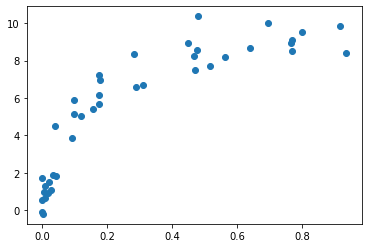

In [27]:
plt.scatter(X,y)

Ahora podemos visualizar nuestros datos, junto con ajustes polinómicos de varios grados.

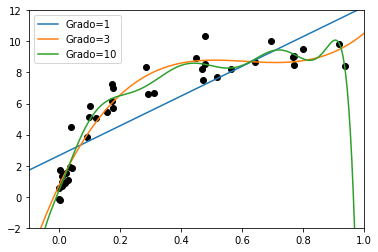

In [28]:
plt.scatter(X.ravel(), y, color='black')
X_model = np.linspace(-0.1, 1.1, 500)[:, None]
axis = plt.axis()
for degree in [1, 3, 10]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_model)
    plt.plot(X_model.ravel(), y_test, label='Grado={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

Lo que controla la complejidad del modelo en este caso es el grado del polinomio. ¿qué grado de polinomio proporciona una compensación adecuada entre el sesgo (subajuste) y la varianza (sobreajuste)?

Podemos visualizar la curva de validación para este modelo y datos particulares; Esto se puede hacer directamente usando la función validation_curve provista por Scikit-Learn. Dado un modelo, datos, nombre de parámetro y un rango para explorar, esta función calculará automáticamente tanto el puntaje de entrenamiento como el puntaje de validación en todo el rango

In [29]:
from sklearn.model_selection import validation_curve

In [32]:
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          param_name='polynomialfeatures__degree', param_range=degree, cv=7)

In [33]:
train_score

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.72060505, 0.73235327, 0.71615237, 0.75517775, 0.6979951 ,
        0.74351307, 0.71104367],
       [0.8966661 , 0.89427274, 0.88460403, 0.90482859, 0.87685741,
        0.90106431, 0.90420325],
       [0.92830604, 0.93586649, 0.93273606, 0.95501615, 0.91919623,
        0.92673491, 0.9402878 ],
       [0.9386132 , 0.94947024, 0.94775706, 0.9632512 , 0.93425141,
        0.94148127, 0.94641559],
       [0.94121068, 0.94988755, 0.94891078, 0.9637873 , 0.93481636,
        0.94464031, 0.94706837],
       [0.94280027, 0.95011515, 0.95028793, 0.96555698, 0.93622172,
        0.94504929, 0.94928043],
       [0.94465044, 0.95166164, 0.95034312, 0.96584535, 0.93731514,
        0.94571392, 0.95274503],
       [0.94465097, 0.95169173, 0.95126473, 0.96709791, 0.93735454,
        0.9484231 , 0.95274521],
       [0.94935834, 0.9537075 , 0.95317786, 0.96799601, 0.93964532,
        0.9490145 , 0.9

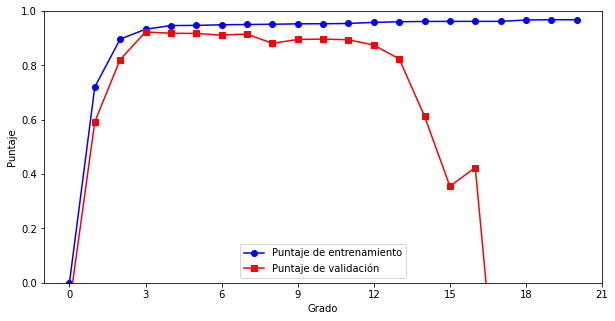

In [38]:
from matplotlib.ticker import MaxNLocator
fig, ax = plt.subplots(1, figsize=(10,5))
plt.plot(degree, np.median(train_score, 1), color='blue', label='Puntaje de entrenamiento',marker='o')
plt.plot(degree, np.median(val_score, 1), color='red', label='Puntaje de validación',marker='s')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('Grado')
plt.ylabel('Puntaje');
ax.xaxis.set_major_locator(MaxNLocator(integer=True))


Esto muestra con precisión el comportamiento cualitativo que esperamos: el puntaje de entrenamiento es en todas partes más alto que el puntaje de validación; el puntaje de entrenamiento mejora monotónicamente con una mayor complejidad del modelo; y la puntuación de validación alcanza un máximo antes de caerse a medida que el modelo se sobreajusta.

A partir de la curva de validación, podemos deducir que el equilibrio óptimo entre sesgo y varianza se encuentra para un polinomio de tercer orden:

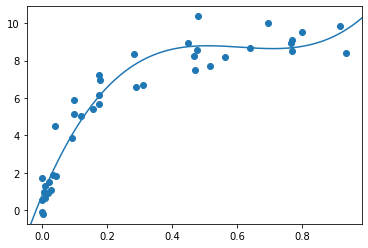

In [39]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_model)
plt.plot(X_model.ravel(), y_test);
plt.axis(lim);

## Curvas de aprendizaje


Un aspecto importante de la complejidad del modelo es que el modelo óptimo generalmente dependerá del tamaño de los datos de entrenamiento. Por ejemplo, generemos un nuevo conjunto de datos con un factor de cinco puntos más:


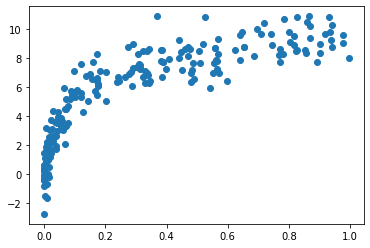

In [40]:
X2, y2 = datos(200)
plt.scatter(X2.ravel(), y2);

Trazemos la curva de validación

In [41]:
X.shape,X2.shape

((40, 1), (200, 1))

In [50]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                             param_name='polynomialfeatures__degree', param_range=degree,  cv=7)

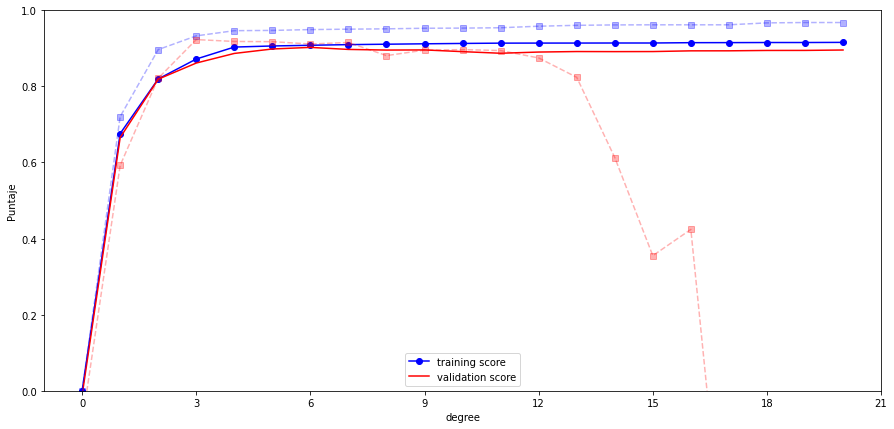

In [51]:
fig, ax = plt.subplots(1, figsize=(15,7))
plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score',marker='o')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed',marker='s')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed',marker='s')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');
plt.ylabel('Puntaje');
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

Las líneas continuas muestran los nuevos resultados, mientras que las líneas discontinuas más débiles muestran los resultados del conjunto de datos anterior más pequeño. A partir de la curva de validación, es claro que el conjunto de datos más grande puede admitir un modelo mucho más complicado: el pico se da alrededor de un grado 6, pero incluso un modelo de grado 20 no está sobreajustando los datos: los puntajes de entrenamiento y de validación están muy cercanos. Por lo tanto, vemos que el comportamiento de la curva de validación no tiene una sino dos entradas importantes: la complejidad del modelo y el número de puntos de entrenamiento.

Scikit-Learn ofrece una práctica utilidad para calcular tales curvas de aprendizaje de sus modelos; Aquí calcularemos una curva de aprendizaje para nuestro conjunto de datos original con un modelo polinomial de segundo orden y un polinomio de noveno orden:

In [52]:
from sklearn.model_selection import learning_curve

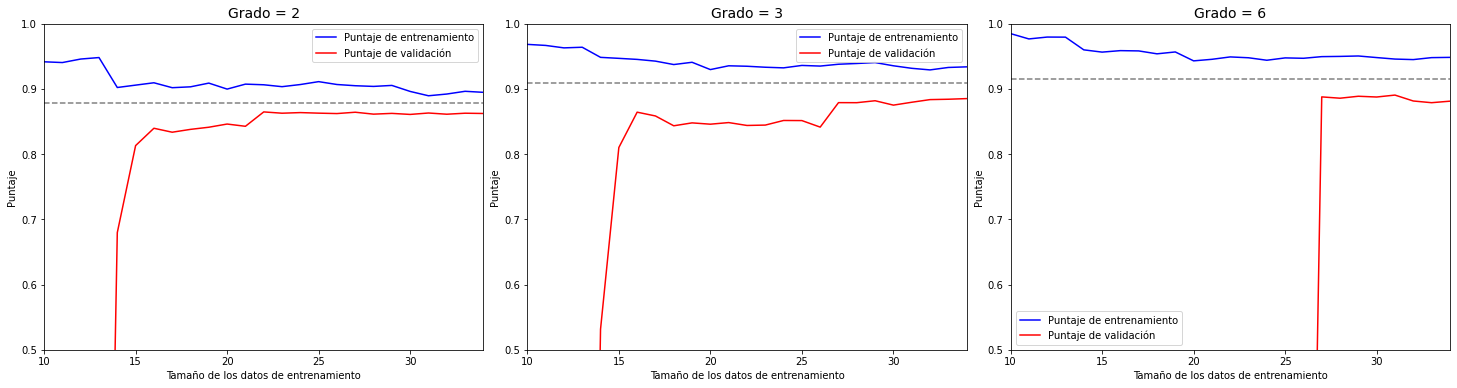

In [53]:
fig, ax = plt.subplots(1, 3, figsize=(22, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, degree in enumerate([2, 3, 6]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='Puntaje de entrenamiento')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='Puntaje de validación')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0.5, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('Tamaño de los datos de entrenamiento')
    ax[i].set_ylabel('Puntaje')
    ax[i].set_title('Grado = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

Este es un diagnóstico valioso, porque nos da una descripción visual de cómo nuestro modelo responde al aumento de los datos de entrenamiento. En particular, cuando la curva de aprendizaje ya ha convergido (es decir, cuando las curvas de entrenamiento y validación ya están cercanas entre sí), ¡agregar más datos de entrenamiento no mejorará significativamente el ajuste! Esta situación se ve en el panel izquierdo, con la curva de aprendizaje para el modelo de grado 2.

Trazar una curva de aprendizaje para nuestra elección particular de modelo y conjunto de datos puede ayudarnos a tomar una decisión sobre cómo avanzar para mejorar el análisis.

## Bootstrapping


También nos es posible hacer la validación del modelo haciendo un particionado de nuestros datos de tal forma que sea posible un remuestreo de los datos, con ello es posible generar estadísticas con niveles de confianza, algo que no es posible si usamos otros métodos como CV.

La partición del dataset se haría de la siguiente forma:



*   Seleccionar un tamaño de muestra de entrenamiento que se desea.
*   Mientras el tamaño sea menor que el tamaño elegido.
  * Seleccionar una instancia de forma aleatoria y añadirla a la muestra.
* Todos los datos que no hayan sido elegidos para la muestra de entrenamiento serán elegidos como muestra de test. A éstos datos se les conoce generalmente como out of bags (fuera de la bolsa).

Note que en la selección es posible que una instancia sea elegida más de una vez para hacer parte de la muestra de entrenamieto, sin embargo jamás habrán instancias en ambas muestras (train, test).

Así es posible generar estadísticas de la robustes de nuestro algoritmo sobre datos nunca vistos.


En general entonces el procedimiento de validación por bootstrap será:



*   Elija un numero de repeticiones de bootstrap.
*   Elija un tamaño de muestra. 
*   Para cada muestra de bootstrap.
  *  Haga una partición como se indicó anteriormente.
  *  Entrene el modelo con la muestra de entrenamiento.
  *  Haga el estimado del error de predicción del modelo con la metrica elegida sobre la muestra de test.
* Calcume la media y la varianza de sus errores.

Una ventaja de éste método es que las estimaciones deben distribuirse de forma gaussiana.

**Tenga en cuenta que:**
El tamaño elegido para la muestra del bootstrap por lo general es el mismo tamaño del dataset, a menos que tengamos un dataset demasiado grande y su costo computacional sea excesivo, en dichos casos suele usarse al rededor de un 50%.

El numero de repeticiones debe ser grande, de tal forma que se genere estadística, se aconseja que como mínimo sean 30 repeticiones.


![picture](https://d3ansictanv2wj.cloudfront.net/emlm_0302-6a388b903f6e1e04c95e718940eff039.png)




In [60]:
from sklearn.utils import resample #metodo de muestreo con remplazo
data = [round(0.1*i,1) for i in range(15)]
data

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4]

In [61]:
#crear la muestra de bootstrap 
boot = resample(data, replace=True, n_samples=5, random_state=3)

In [62]:
print('Bootstrap:',boot)
# out of bag 
oob = [x for x in data if x not in boot]
print('OOB:',oob)

Bootstrap: [1.0, 0.8, 0.9, 0.3, 0.8]
OOB: [0.0, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 1.1, 1.2, 1.3, 1.4]


Validemos con éste método sobre un modelo lineal de los creados en clases pasadas:

In [63]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn import metrics

In [64]:
df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')
df.dropna(inplace=True)
data= df[['ENGINESIZE','CO2EMISSIONS']].values
data.shape

(1067, 2)

In [66]:
MAE = []
n_rep = 100
for i in range(n_rep):
  boot = resample(data, replace=True, n_samples=int(len(data)/2))
  oob = np.array([x for x in data if x.tolist() not in boot.tolist()])
   
  X_train = boot[:,0].reshape(-1,1)
  y_train = boot[:,1]
  X_test = oob[:,0].reshape(-1,1)
  y_test = oob[:,1]
  #entrenamos el modelo
  elastic = ElasticNet(alpha=0.01,l1_ratio=1,normalize=True)
  elastic.fit(X_train,y_train)
  y_pred = elastic.predict(X_test)
  mae = metrics.mean_absolute_error(y_test, y_pred)
  MAE.append(mae)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If

In [67]:
np.mean(MAE), np.std(MAE)

(28.449927592224707, 1.0710951672204616)

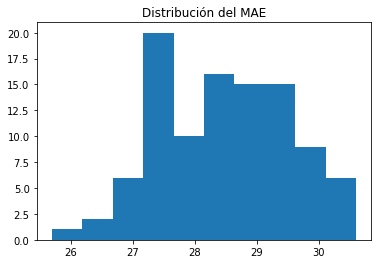

In [68]:
import matplotlib.pyplot as plt
plt.hist(MAE)
plt.title(r'Distribución del MAE')
plt.show()

In [69]:
media = np.mean(MAE)
dstd = np.std(MAE)
print('Error MAE:',media,'+/-',dstd)

Error MAE: 28.449927592224707 +/- 1.0710951672204616


Como vemos es posible generar estadísticas sobre nuestros errores y su distribución, además de su intervalo de confianza, así podemos hacer afirmaciones con mayor certeza dobre la robustez de nuetro modelo.

## Gridsearch para la optimización de hiper-parámetros

Un paso fundamental en cualquier modelado es el ajuste de los hiper-parámetros para generar un modelo cuya compenzación sesgo/varianza sea optima.

La idea básica es, como se hizo en la sesión pasada, explorar un amplio espacio de hiper-parámetros haciendo combinaciones posibles de ellos y usando alguna metrica escoger el mejor posible.

En scikit-learn nos es posible hacerlo de dos formas:



*   Haciendo un barrido completo de las combinaciones de hiper-parámetros (GridSearchCV)
*   Haciendo un barrido aleatorio de las combinaciones de hiper-parámetros (RandomizedSearchCV)

El primero es útil si deseamos tener un conocimiento mejor de nuestro espacio de hiper-parámetros, pero no es aconsejable si son demasiadas combinaciones o si nuestro algoritmo es lento en entrenamiento.
Ambos métodos los encontrarémos en 'sklearn.model_selection'


https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn import metrics
from sklearn.svm import SVR

In [71]:
df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')
X = df['ENGINESIZE'].values.reshape(-1,1)
y = df['CO2EMISSIONS'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=3)

In [72]:
# creamos los diccionarios sobre los que exploraremos
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [73]:
#para ver las posibles metricas: https://scikit-learn.org/stable/modules/model_evaluation.html

clf = GridSearchCV(SVR(), tuned_parameters, cv=5,scoring= 'r2')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             scoring='r2')

In [75]:
print("Mejor conjunto de parámetros:")
print()
print(clf.best_params_)

Mejor conjunto de parámetros:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [78]:
print("Media y desviación:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.4f (+/-%0.03f) for %r"
          % (mean, std , params))

Media y desviación:

0.0374 (+/-0.015) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
-0.0107 (+/-0.016) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.3957 (+/-0.021) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.0378 (+/-0.015) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.7458 (+/-0.018) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.3980 (+/-0.021) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.7623 (+/-0.018) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.7455 (+/-0.018) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.7612 (+/-0.017) for {'C': 1, 'kernel': 'linear'}
0.7620 (+/-0.017) for {'C': 10, 'kernel': 'linear'}
0.7622 (+/-0.017) for {'C': 100, 'kernel': 'linear'}
0.7622 (+/-0.017) for {'C': 1000, 'kernel': 'linear'}


In [79]:
clf = RandomizedSearchCV(SVR(), tuned_parameters, cv=5,scoring= 'r2',n_iter=10)
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVR(),
                   param_distributions=[{'C': [1, 10, 100, 1000],
                                         'gamma': [0.001, 0.0001],
                                         'kernel': ['rbf']},
                                        {'C': [1, 10, 100, 1000],
                                         'kernel': ['linear']}],
                   scoring='r2')

In [80]:
print("Mejor conjunto de parámetros:")
print()
print(clf.best_params_)

Mejor conjunto de parámetros:

{'kernel': 'rbf', 'gamma': 0.001, 'C': 1000}


In [81]:
print("Media y desviación:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))


Media y desviación:

0.761 (+/-0.035) for {'kernel': 'linear', 'C': 1}
0.762 (+/-0.035) for {'kernel': 'linear', 'C': 10}
0.037 (+/-0.029) for {'kernel': 'rbf', 'gamma': 0.001, 'C': 1}
0.038 (+/-0.029) for {'kernel': 'rbf', 'gamma': 0.0001, 'C': 10}
0.746 (+/-0.035) for {'kernel': 'rbf', 'gamma': 0.0001, 'C': 1000}
0.762 (+/-0.035) for {'kernel': 'linear', 'C': 1000}
0.398 (+/-0.042) for {'kernel': 'rbf', 'gamma': 0.0001, 'C': 100}
0.396 (+/-0.041) for {'kernel': 'rbf', 'gamma': 0.001, 'C': 10}
0.762 (+/-0.035) for {'kernel': 'rbf', 'gamma': 0.001, 'C': 1000}
0.746 (+/-0.036) for {'kernel': 'rbf', 'gamma': 0.001, 'C': 100}


### Ejercicio:

1. En el dataset de autos (a1): elimine los datos faltantes, convierta las variables categoricas en variables dummies (a2), y separe el dataset en datos de entrenamiento y prueba.

2. Use GridSearchCV para explorar el espacio de hiper-parámetros compuesto por $\alpha$ en la lista [0.01,0.1,1,10,100,1000] y l1_ratio en [0.1,0.3,0.6,0.9,0.99,0.999], entrenando  ElasticNet y evaluandolo con RMSE. 

3. ¿Cuál es el mejor conjunto de hiper-parámetros?, ¿cuál es la media y la desviación del error en cada conjunto de hiper-parámetros?.


a1. 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'

a2. `pd.get_dummies()`



###Respuesta

#### Respuesta 1

In [102]:
from sklearn.linear_model import ElasticNet
df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv')
df.dropna(inplace=True)
dummies=pd.get_dummies(df)
X=dummies.drop('price',axis=1)
y=dummies['price']

In [103]:
#X = dummies.drop(['compression-ratio','normalized-losses'],axis=1)
X = dummies.drop(['compression-ratio'],axis=1)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=3)

In [109]:
X_train.shape

(147, 74)

Repuesta 2

In [105]:
grid=[{'alpha':[0.01,0.1,1,10,100,1000],'l1_ratio':[0.1,0.3,0.6,0.9,0.99,0.999]}]
gsearch=GridSearchCV(ElasticNet(),grid,scoring='r2',cv=5)
gsearch.fit(X_train,y_train)
gsearch.best_params_

{'alpha': 0.01, 'l1_ratio': 0.3}

In [106]:
gsearch.best_score_

0.9999999999998954

In [107]:
y_pred = gsearch.predict(X_test)

In [112]:
metrics.mean_absolute_error(y_test, y_pred)

0.0013458236568780824

In [94]:
X.iloc[0]

symboling                     3.000000
normalized-losses           122.000000
wheel-base                   88.600000
length                        0.811148
width                         0.890278
                               ...    
fuel-system_spdi              0.000000
fuel-system_spfi              0.000000
horsepower-binned_High        0.000000
horsepower-binned_Low         0.000000
horsepower-binned_Medium      1.000000
Name: 0, Length: 74, dtype: float64

In [100]:
gsearch.predict(X.iloc[1:2])#np.random.uniform(size=73).reshape(-1, 1))

array([16500.0010739])

In [99]:
y.iloc[1:2]

1    16500.0
Name: price, dtype: float64

In [98]:
gsearch.predict(np.random.uniform(size=(1,74)))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  "X does not have valid feature names, but"


array([0.58376708])